## Observations and Insights 

In [66]:
# Dependencies and Setup
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
study_data_complete.head()
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [67]:
# Check the variables of dataset: mouse_metadata
mouse_metadata = pd.read_csv(mouse_metadata_path)
# mouse_metadata.head()

In [68]:
# Check the variables of dataset: study_results
study_results = pd.read_csv(study_results_path)
# study_results.head()

In [69]:
# Checking the number of mice.
mice_num = study_data_complete["Mouse ID"].value_counts().count()
mice_num
# 249 is the Mice sample size

249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# I am choosing to add "Tumor Volume (mm3) to dataset to prepare the data to answer a future question"
mice_id_time = study_data_complete[["Mouse ID", "Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]
mice_id_time.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,0,45.000000
1,k403,Ramicane,5,38.825898
2,k403,Ramicane,10,35.014271
3,k403,Ramicane,15,34.223992
4,k403,Ramicane,20,32.997729


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id = study_data_complete.groupby("Mouse ID")
dup_mice_id_data = dup_mice_id[["Drug Regimen", "Sex", "Age_months", "Weight (g)","Timepoint", "Tumor Volume (mm3)","Metastatic Sites"]]
dup_mice_id_data.head()
# dup_mice_id_data.describe()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Ramicane,Male,21,16,0,45.000000,0
1,Ramicane,Male,21,16,5,38.825898,0
2,Ramicane,Male,21,16,10,35.014271,1
3,Ramicane,Male,21,16,15,34.223992,1
4,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
1883,Naftisol,Male,9,30,0,45.000000,0
1884,Naftisol,Male,9,30,5,49.332999,0
1885,Naftisol,Male,9,30,10,52.656081,1
1886,Naftisol,Male,9,30,15,54.713005,2


In [72]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_complete_data = study_data_complete.drop_duplicates("Mouse ID")
clean_study_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [73]:
# Checking the number of mice in the clean DataFrame. Already calculated as 249 
num_mice1= clean_study_complete_data["Mouse ID"].value_counts().sum()
# num_mice1

mice_per_regime = clean_study_complete_data[["Drug Regimen","Mouse ID"]]
# mice_per_regime.describe()

sex_data = clean_study_complete_data[["Sex","Mouse ID"]]
# sex_data.describe()



In [113]:
# Setting a list of "Drug Regimens" to use in future question to answer
drug_regimens = clean_study_complete_data["Drug Regimen"].unique()
drug_regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimens = study_data_complete.groupby("Drug Regimen")

# mice_regimen =
tumor_data = drug_regimens[["Tumor Volume (mm3)"]]
mean = tumor_data.mean()
median = tumor_data.median()
variance = tumor_data.var()
std = tumor_data.std()
sem = tumor_data.sem()

tumor_data_stats = mean
tumor_data_stats["Median"]=(median)
tumor_data_stats["Variance"]=(variance)
tumor_data_stats["Standard Deviation"]=(std)
tumor_data_stats["SEM"]=(sem)
tummor_data_stats = tumor_data_stats.rename(columns={"Tumor Volume (mm3)":"Mean"})
tumor_data_stats 

,Tumor Volume (mm3),Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_data_stats_sl= tumor_data_stats.reset_index()
tumor_data_stats_sl = tumor_data_stats_sl.drop(columns=["Drug Regimen"]).mean()
tumor_data_stats_sl_df = pd.DataFrame(tumor_data_stats_sl)
tumor_data_stats_sl_df 

,0
Tumor Volume (mm3),50.976144
Median,49.942960
Variance,47.708346
Standard Deviation,6.809671
SEM,0.499641


## Bar and Pie Charts

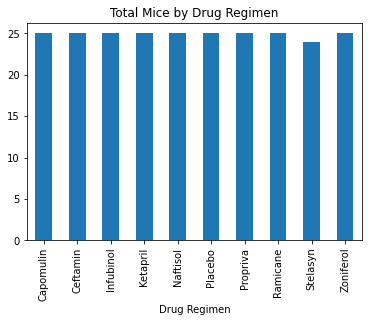

In [78]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_per_regime_final = mice_per_regime.pivot(columns="Drug Regimen", values = "Drug Regimen").count()

mice_per_regime_final.plot( kind = "bar", title= "Total Mice by Drug Regimen", y="Mice Number")


TypeError: unhashable type: 'numpy.ndarray'

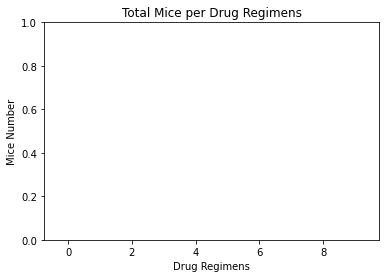

In [109]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

mice_per_regime_final

# Printed drug_regimes to get x labels
drug_regimens = x_axis

tick_locations = x_axis
    
plt.title("Total Mice per Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Mice Number") 

plt.xlim(-0.75, len(x_axis)-0.25)

plt.bar(x_axis, mice_per_regime_final, color='r', alpha=0.75, align="center")
plt.xticks(tick_locations,['Ramican', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'], rotation="vertical")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_data = clean_study_complete_data[["Sex","Mouse ID"]]
sex_data_final = sex_data.pivot(columns = "Sex", values = "Sex").count()
sex_data_final.plot (kind = "pie", title = "Gender Distribution") 


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data_final
# I printed sex_data_final to get the labels and sizes to input into the pie graph

title = ["Gender Distribution"]
labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["orange", "lightblue"]
explode = (0.1, 0)


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mice_id_time = study_data_complete[["Timepoint","Mouse ID", "Drug Regimen","Tumor Volume (mm3)"]]
mice_id_time = mice_id_time.sort_values("Timepoint", ascending = False)
mice_id_time = mice_id_time.set_index("Timepoint")
mice_id_time_45 = mice_id_time.loc[45,:]
mice_id_time_45 = mice_id_time_45.reset_index()
mice_id_time_45 = mice_id_time_45.drop(columns=["Timepoint"])
mice_id_time_45 = mice_id_time_45.set_index("Drug Regimen")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin = mice_id_time_45.loc[["Capomulin"],["Tumor Volume (mm3)"]]
Capomulin_df = pd.DataFrame(Capomulin)
Capomulin_df = Capomulin.reset_index()
Capomulin_Tumor_vol = Capomulin_df.drop(columns=["Drug Regimen"])
Capomulin_Tumor_vol = Capomulin_Tumor_vol["Tumor Volume (mm3)"]
# Capomulin_Tumor_vol

Ramicane = mice_id_time_45.loc[["Ramicane"],["Tumor Volume (mm3)"]]
Ramicane_df = pd.DataFrame(Ramicane)
Ramicane_df = Ramicane.reset_index()
Ramicane_Tumor_vol = Ramicane_df.drop(columns=["Drug Regimen"])
Ramicane_Tumor_vol = Ramicane_Tumor_vol["Tumor Volume (mm3)"]
# Ramicane_Tumor_vol

Infubinol = mice_id_time_45.loc[["Infubinol"],["Tumor Volume (mm3)"]]
Infubinol_df = pd.DataFrame(Ramicane)
Infubinol_df = Infubinol.reset_index()
Infubinol_Tumor_vol = Infubinol_df.drop(columns=["Drug Regimen"])
Infubinol_Tumor_vol = Infubinol_Tumor_vol["Tumor Volume (mm3)"]
# Infubinol_Tumor_vol

Ceftamin = mice_id_time_45.loc[["Ceftamin"],["Tumor Volume (mm3)"]]
Ceftamin_df = pd.DataFrame(Ramicane)
Ceftamin_df = Ceftamin.reset_index()
Ceftamin_Tumor_vol = Ceftamin_df.drop(columns=["Drug Regimen"])
Ceftamin_Tumor_vol = Ceftamin_Tumor_vol["Tumor Volume (mm3)"]
# Ceftamin_Tumor_vol

# Summary_CRIC = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]
# Summary_CRIC 
# Summary_CRIC_df = pd.DataFrame(Summary_CRIC)
# Summary_CRIC_df



In [81]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR for Capomulin

quartiles = Capomulin_Tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [82]:
Capomulin_Tumor_vol = Capomulin_Tumor_vol.sort_values()
Capomulin_Tumor_vol

# Capomulin data has no potential outliers 

18    23.343598
20    28.430964
19    28.484033
17    31.023923
10    31.896238
11    32.377357
12    33.329098
13    34.455298
15    36.041047
9     37.074024
14    37.311846
0     38.125164
1     38.846876
2     38.939633
3     38.982878
5     40.159220
4     40.658124
6     40.728578
7     41.483008
8     41.581521
16    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [83]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR for Capomulin

quartiles = Ramicane_Tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [84]:
Ramicane_Tumor_vol = Ramicane_Tumor_vol.sort_values()
Ramicane_Tumor_vol

# Ramicane data has no potential outliers 

15    22.050126
18    29.128472
17    30.276232
14    30.564625
16    30.638696
2     31.095335
19    31.560470
6     32.978522
5     33.397653
7     33.562402
8     36.134852
4     36.374510
10    37.225650
0     37.311236
1     38.407618
9     38.810366
3     40.659006
11    40.667713
13    43.047543
12    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [85]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR for Capomulin

quartiles = Infubinol_Tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [86]:
Infubinol_Tumor_vol = Infubinol_Tumor_vol.sort_values()
Infubinol_Tumor_vol

# Infubinol data has no potential outliers 

0    60.918767
2    62.435404
7    62.754451
4    65.525743
6    66.083066
5    66.196912
8    67.685569
3    67.973419
1    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [87]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR for Capomulin

quartiles = Ceftamin_Tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range of Ceftamin is: 6.093590140000003
The the median of Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [88]:
Ceftamin_Tumor_vol = Ceftamin_Tumor_vol.sort_values()
Ceftamin_Tumor_vol

# Ceftamin has no potential outliers

1     59.741901
5     59.851956
10    61.386660
0     61.433892
3     61.849023
7     62.999356
4     64.299830
9     64.634949
11    64.729837
2     67.527482
6     67.748662
12    68.594745
8     68.923185
Name: Tumor Volume (mm3), dtype: float64

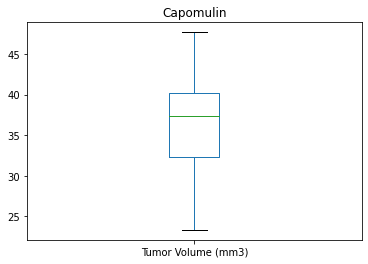

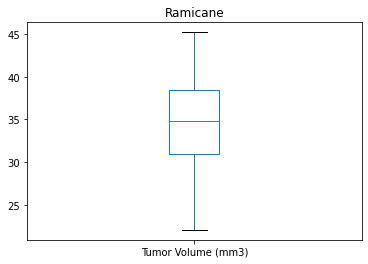

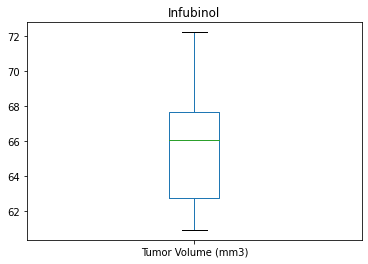

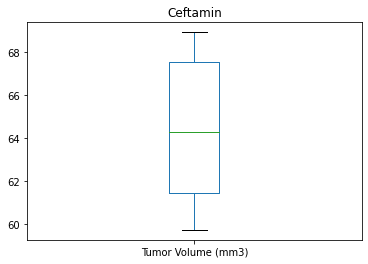

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Capomulin.plot (kind = "box", title="Capomulin")
Ramicane.plot (kind = "box",title="Ramicane")
Infubinol.plot (kind = "box",title="Infubinol")
Ceftamin.plot (kind="box",title="Ceftamin")


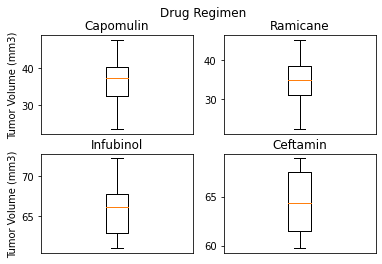

In [90]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Still have to figure out how to add Y axis label for the whole figure


fig, ax = plt.subplots(2,2)
fig.suptitle("Drug Regimen")
# fig.ylabel('Tumor Volume (mm3)')

ax[0,0].set_title('Capomulin')
ax[0,0].boxplot(Capomulin_Tumor_vol)
ax[0,0].set_ylabel('Tumor Volume (mm3)')
plt.sca(ax[0,0])
plt.xticks([])

ax[0,1].set_title('Ramicane')
ax[0,1].boxplot(Ramicane_Tumor_vol)
plt.sca(ax[0,1])
plt.xticks([])

ax[1,0].set_title('Infubinol')
ax[1,0].boxplot(Infubinol_Tumor_vol)
ax[1,0].set_ylabel('Tumor Volume (mm3)')
plt.sca(ax[1,0])
plt.xticks([])

ax[1,1].set_title('Ceftamin')
ax[1,1].boxplot(Ceftamin_Tumor_vol)
plt.sca(ax[1,1])
plt.xticks([])

plt.show()



## Line and Scatter Plots

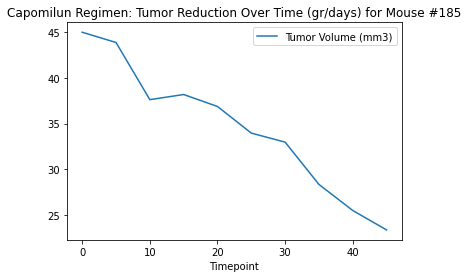

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

drug_tumorvol_time = study_data_complete[["Drug Regimen", "Mouse ID",  "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
drug_tumorvol_time = drug_tumorvol_time.set_index("Drug Regimen")
Capomulin_tumorvol_time = drug_tumorvol_time.loc[["Capomulin"],["Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
Capomulin_tumorvol_time_mouse = Capomulin_tumorvol_time.set_index("Mouse ID")
Capomulin_tumorvol_time_mouse_s185 = Capomulin_tumorvol_time_mouse.loc["s185", :]
Capomulin_tumorvol_time_mouse_s185 = Capomulin_tumorvol_time_mouse_s185.set_index("Timepoint")

Capomulin_tumorvol_time_mouse_s185.plot (kind = "line", title= "Capomilun Regimen: Tumor Reduction Over Time (gr/days) for Mouse #185")


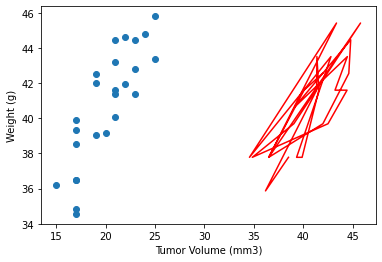

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_tumorvol_time = drug_tumorvol_time.loc[["Capomulin"],["Mouse ID", "Tumor Volume (mm3)", "Weight (g)"]]
Capomulin_tumorvol_time_mouse = Capomulin_tumorvol_time.groupby("Mouse ID").mean()
# Capomulin_tumorvol_time_mouse.describe()

avg_weight = Capomulin_tumorvol_time_mouse["Weight (g)"]
avg_tumor_vol = Capomulin_tumorvol_time_mouse["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_weight, avg_tumor_vol)
regress_values = avg_weight * slope + intercept
line_eq = "avg_tumor_vol = " + str(round(slope)) + "avg_weight + " + str(round(intercept))
plt.scatter(avg_weight, avg_tumor_vol)
plt.plot(avg_tumor_vol,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.show()


# Capomulin_tumorvol_time_mouse.plot.scatter (x = "Tumor Volume (mm3)", y= "Weight (g)", title = "Capomulin Regimen: Average Tumor Volume vs. Mouse Weight")


## Correlation and Regression

In [54]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Still need to figure out how to do a liner regression to using the following dataset
# >>> from scipy import stats
# >>> import numpy as np
# >>> x = np.random.random(10)
# >>> y = np.random.random(10)
# >>> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

# x_values = data['bp']
# y_values = data['1Y_Disease_Progress']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Normalized Blood Pressure')
# plt.ylabel('1Y_Disease_Progress')
# print(f"The r-squared is: {rvalue**2}")
# plt.show()


avg_weight = Capomulin_tumorvol_time_mouse["Weight (g)"]
avg_tumor_vol = Capomulin_tumorvol_time_mouse["Tumor Volume (mm3)"]
correlation = st.pearsonr(avg_weight, avg_tumor_vol)
correlation



(0.8419363424694717, 1.322572243471279e-07)